In [1]:
import keras
import tensorflow as tf
from keras.layers import Dense, Dropout, Convolution2D, Flatten, MaxPool2D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

Using TensorFlow backend.


In [2]:
fashion_mnist = keras.datasets.mnist

In [3]:
dataset = fashion_mnist.load_data()

In [4]:
(x_train, y_train), (x_test, y_test) = dataset
x_train, x_test = x_train/255, x_test/255
x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)
y_train = np.array(pd.get_dummies(y_train))

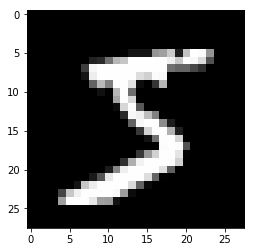

In [5]:
plt.imshow(dataset[0][0][0], cmap='Greys_r')

In [6]:
model = keras.Sequential()
model.add(Convolution2D(8, 15, 15, activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(2, 2))
model.add(Convolution2D(8, 5, 5, activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Flatten())
model.add(Dense(90, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

C:\Users\AKSHAT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (15, 15), activation="relu", input_shape=(28, 28, 1...)`
  
W0529 20:54:16.184683 14348 deprecation_wrapper.py:119] From C:\Users\AKSHAT\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

C:\Users\AKSHAT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (5, 5), activation="relu")`
  after removing the cwd from sys.path.


In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

W0529 20:54:16.293979 14348 deprecation.py:323] From C:\Users\AKSHAT\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
model.fit(x_train, y_train, batch_size=5, epochs=10, validation_split=0.2)

W0529 20:54:20.357050 14348 deprecation_wrapper.py:119] From C:\Users\AKSHAT\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 52s 1ms/step - loss: 0.0563 - accuracy: 0.9807 - val_loss: 0.0256 - val_accuracy: 0.9918
Epoch 2/10
48000/48000 [==============================] - 45s 941us/step - loss: 0.0247 - accuracy: 0.9918 - val_loss: 0.0223 - val_accuracy: 0.9930
Epoch 3/10
48000/48000 [==============================] - 44s 910us/step - loss: 0.0204 - accuracy: 0.9932 - val_loss: 0.0176 - val_accuracy: 0.9945
Epoch 4/10
48000/48000 [==============================] - 40s 843us/step - loss: 0.0185 - accuracy: 0.9938 - val_loss: 0.0184 - val_accuracy: 0.9946
Epoch 5/10
48000/48000 [==============================] - 41s 861us/step - loss: 0.0170 - accuracy: 0.9944 - val_loss: 0.0208 - val_accuracy: 0.9934
Epoch 6/10
48000/48000 [==============================] - 45s 938us/step - loss: 0.0161 - accuracy: 0.9947 - val_loss: 0.0194 - val_accuracy: 0.9936
Epoch 7/10
48000/48000 [==============================] - 

In [9]:
predictions = model.predict(x_test)

In [10]:
b = np.zeros_like(predictions)
b[np.arange(len(predictions)), predictions.argmax(1)] = 1

In [11]:
b = pd.DataFrame(b)
s2 = b.idxmax(axis=1)

In [12]:
metrics.accuracy_score(s2,y_test)

0.9748

In [13]:
metrics.confusion_matrix(s2,y_test)

array([[ 965,    0,    1,    0,    1,    4,   23,    1,    2,    1],
       [   1, 1127,    2,    0,    0,    0,    1,    4,    1,    2],
       [   1,    1, 1003,    4,    2,    0,    1,    3,    4,    0],
       [   0,    2,    4,  994,    0,   24,    0,    3,   10,    3],
       [   2,    0,    3,    0,  969,    1,   15,    2,    4,    7],
       [   4,    1,    0,    5,    0,  850,    9,    2,    2,    5],
       [   0,    1,    3,    0,    1,    1,  908,    0,    2,    0],
       [   3,    2,   12,    3,    0,    1,    0, 1005,    2,    7],
       [   2,    1,    4,    0,    1,    4,    1,    2,  945,    2],
       [   2,    0,    0,    4,    8,    7,    0,    6,    2,  982]],
      dtype=int64)

In [20]:
model.layers[0].get_weights()[0].shape

(15, 15, 1, 8)

In [36]:
model.save('number_recognition.model')